In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


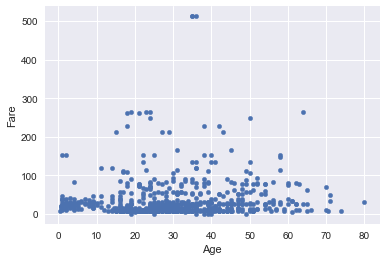

In [6]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
train_df.plot(x = 'Age',y = 'Fare' ,kind = 'scatter')

In [7]:
train_df.head(n= 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


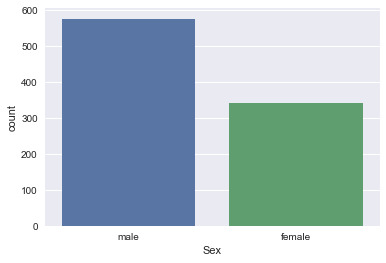

In [9]:
sns.countplot(x = 'Survived',data = train_df)
sns.countplot(x = 'Sex',data = train_df)

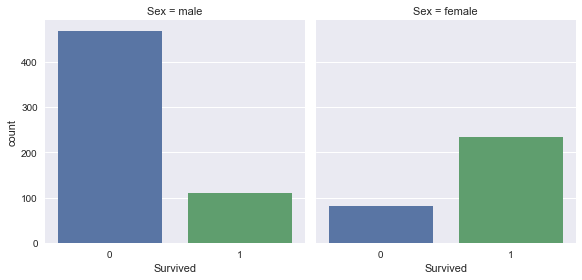

In [10]:
sns.factorplot(x = 'Survived',col= 'Sex',kind = 'count',data = train_df)

In [18]:
train_df.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [17]:
print(train_df[train_df.Sex == 'female'].Survived.sum()/train_df[train_df.Sex == 'female'].Survived.count())
print(train_df[train_df.Sex == 'male'].Survived.sum()/train_df[train_df.Sex == 'male'].Survived.count())

0.742038216561
0.188908145581


In [25]:
test_df['Survived'] = test_df.Sex == 'female'
test_df['Survived'] = test_df.Survived.apply(lambda x:int(x))
test_df.head(n=3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [26]:
test_df[['PassengerId','Survived']].to_csv('titanic/women.csv',index = False)